<a href="https://colab.research.google.com/github/vabAmmoIsHere/Q-Amodel/blob/main/text_data_gathering_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GATHERING DATA from Data Science books

"https://www.learndatasci.com/free-data-science-books/""

In [ ]:

! pip install wget
! pip install asyncio

import wget


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=b3ae8723cb185ace57be88bb2d8b999312c2c22a8d647af68271a53fa46690ad
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 101 kB 3.7 MB/s 


In [ ]:
# creating fake header and using proxy
! pip install fake-headers
from fake_headers import Headers
import random

def headers():
  os = random.choice(['win', 'mac', 'lin'])
  browser = random.choice(['chrome', 'firefox', 'opera'])
  return Headers(os=os, browser=browser, headers=True).generate()

header = headers()

In [ ]:
# crawling the web page to download the pdf books
# I have changed the api key, create your own account crawlera/zyte and share the cert location (or SSLERROR)
import requests
from bs4 import BeautifulSoup
proxies = "http://ea3b34d297754cff9f0c1e36bfc5d367:@proxy.crawlera.com:8011/"  
def get_pdf_recursion(url):
  
  count = 0
  try:
    response = requests.get(url=url, headers=header, proxies={"http": proxies, "https": proxies}, verify= "/zyte-proxy-ca_NEW.crt")
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    url_tags = soup.find_all("a")
    for tag in url_tags:
      if "pdf" in tag.get("href"):
        try:
          wget.download(tag.get("href"))
          count+=1
          if count >=10:
            break
        except Exception as e:
          e
      elif (tag.get_text().strip() == "View Free Book" and "pdf" not in tag.get("href")):
        url = tag.get("href")
        try:
          get_pdf_recursion(url)
        except Exception as e:
          e
  except Exception as e:
    e        
  
# executing the script
url = "https://www.learndatasci.com/free-data-science-books"
get_pdf_recursion(url)



        
       


################################

Cleaning the data is the second phase in your data modeling and training

;

In [100]:
# read all the pdf files stored in the pdf directory

import os
! pip install tika
pdfs = os.listdir(r'/content/pdf_files')
print(pdfs)


['KB_neural_data_mining.pdf', 'disruptive-possibilities.pdf', 'real-world-active-learning.pdf', 'ciml-v0_9-all.pdf', '240415.pdf', 'gsl_stats.pdf', 'SzeliskiBookDraft_20210930.pdf', '0904.3664.pdf', 'RLAlgsInMDPs.pdf', 'RW.pdf', 'artificial-intelligence-modern-approach.9780131038059.25368.pdf']


In [102]:
# importing packages for data cleaning
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop

In [103]:
# parsing pdf books
from tika import parser

data_list = []
for pdf in pdfs:
  if pdf.endswith(".pdf"):
    path_with_file = os.path.join(r'/content/pdf_files/', pdf)
    print(path_with_file)
    with open(path_with_file, "rb") as f:
      file_data = parser.from_file(f)
      text = file_data['content']
      data_list.append(text)

# created dataframe object 
df = pd.DataFrame(data_list)


/content/pdf_files/KB_neural_data_mining.pdf
/content/pdf_files/disruptive-possibilities.pdf
/content/pdf_files/real-world-active-learning.pdf
/content/pdf_files/ciml-v0_9-all.pdf
/content/pdf_files/240415.pdf
/content/pdf_files/gsl_stats.pdf
/content/pdf_files/SzeliskiBookDraft_20210930.pdf
/content/pdf_files/0904.3664.pdf
/content/pdf_files/RLAlgsInMDPs.pdf
/content/pdf_files/RW.pdf
/content/pdf_files/artificial-intelligence-modern-approach.9780131038059.25368.pdf


In [104]:
# Viewing data in data frame
df[0].sample(2)

4    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
5    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
Name: 0, dtype: object

In [105]:
# few more stats that are important in nlp 
# word_count: 
df['word_count'] = df[0].apply(lambda x: len(str(x).split()))

In [106]:
# let's view a randomly selected sample dataset and the word_count
df.sample(10)

,0,word_count
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,34739
9,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,118816
4,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,315097
3,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,76311
8,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,39528
1,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,26064
2,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,6011
10,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,447365
6,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,7
5,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,164032


In [107]:
# maximum words in a cell (statistics chapter) and # minimum words in a cell 
max = df['word_count'].max()
min = df['word_count'].min()
print('maximun words in a chapter: ', max, '\n\nminimum words in a chapter: ', min)

maximun words in a chapter:  447365 

minimum words in a chapter:  7


In [108]:
# char counts in each cell
def char_count(text: str):
  s = text.split()
  new_text = ' '.join(s)
  return len(new_text)

print('no of characters: ', char_count('random writing to count characters in a text'))

no of characters:  44


In [109]:
df['char_count'] = df[0].apply(lambda x: char_count(x))
df.sample(2)

,0,word_count,char_count
9,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,118816,691520
5,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,164032,956177


In [110]:
df['avg_word_length'] = df['char_count']/df['word_count']
df.sample(4)

,0,word_count,char_count,avg_word_length
4,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,315097,1699846,5.394675
6,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,7,61,8.714286
7,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,36716,191442,5.214130
2,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,6011,38189,6.353186


In [111]:
# stop words
# calling stopword function from spacy(imported earlier)-stopwords identified by spacy
print(stop) 
print(len(stop))

{'seems', 'each', 'off', 'its', 'before', 'this', 'serious', 'my', 'them', 'sometime', 'indeed', 'others', 'put', 'what', 'whereas', "'ve", 'have', 'above', 'give', 'ourselves', 'will', 'by', 'behind', 'any', 'rather', 'down', 'did', 'empty', 'too', 'afterwards', 'not', '‘ll', 'doing', 'whereafter', 'therein', 'hers', 'much', 'forty', 're', 'onto', 'nevertheless', 'back', 'ours', 'either', 'amount', 'while', 'until', 'side', 'hereafter', 'n’t', 'therefore', '’s', 'top', 'everywhere', 'you', 'five', 'every', 'keep', 'perhaps', 'may', 'somehow', 'himself', 'full', 'an', 'eleven', 'should', 'along', 'about', 'me', 'when', 'get', 'be', '’d', 'after', 'both', 'can', 'say', 'to', 'beyond', 'on', 'been', 'unless', 'per', 'one', 'due', 'itself', 'through', 'it', 'no', 'just', 'anyone', 'mine', 'became', 'really', 'n‘t', 'else', 'their', 'but', '’re', 'myself', 'besides', 'he', 'because', 'across', 'thus', 'seeming', 'formerly', 'two', 'someone', 'do', 'move', 'was', 'that', 'latterly', 'within

In [112]:
# check for no. stopwords in our text
df['stop_words_len'] = df[0].apply(lambda x: len([t for t in x.split() if t in stop]))
df.sample(10)

,0,word_count,char_count,avg_word_length,stop_words_len
7,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,36716,191442,5.214130,12083
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,34739,213100,6.134316,5810
8,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,39528,227103,5.745370,12329
5,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,164032,956177,5.829210,62575
9,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,118816,691520,5.820092,35875
1,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,26064,161348,6.190454,10598
2,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,6011,38189,6.353186,2356
4,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,315097,1699846,5.394675,86801
6,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,7,61,8.714286,1
3,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,76311,426100,5.583730,29439


In [113]:
df['no_of_digits'] = df[0].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.sample(2)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
10,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,447365,2663911,5.954670,168319,7361
2,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,6011,38189,6.353186,2356,44


In [114]:
# remove special characters
import re
df[0] = df[0].apply(lambda x: re.sub(r'[^\w ]+', " ", x))
df.sample(5)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
8,Algorithms for Reinforcement Learning Draft o...,39528,227103,5.745370,12329,381
5,gsl_stats March 24 2009 Modeling with Data g...,164032,956177,5.829210,62575,4366
6,Dropbox SzeliskiBookDraft_20210930 pdf Si...,7,61,8.714286,1,0
7,Introduction to Machine Learning 67577 Fall...,36716,191442,5.214130,12083,705
4,My title Bayesian Reasoning and Machine Learn...,315097,1699846,5.394675,86801,9762


In [115]:
# removing extra spaces
df[0] = df[0].apply(lambda x: ' '.join(x.split()))
df.sample(10)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
6,Dropbox SzeliskiBookDraft_20210930 pdf Simplif...,7,61,8.714286,1,0
7,Introduction to Machine Learning 67577 Fall 20...,36716,191442,5.214130,12083,705
9,Gaussian Processes for Machine Learning C E Ra...,118816,691520,5.820092,35875,3962
3,A Course in Machine Learning A Course in Machi...,76311,426100,5.583730,29439,1198
10,Artificial Intelligence A Modern Approach Stua...,447365,2663911,5.954670,168319,7361
4,My title Bayesian Reasoning and Machine Learni...,315097,1699846,5.394675,86801,9762
8,Algorithms for Reinforcement Learning Draft of...,39528,227103,5.745370,12329,381
2,real world active learning Make Data Work stra...,6011,38189,6.353186,2356,44
5,gsl_stats March 24 2009 Modeling with Data gsl...,164032,956177,5.829210,62575,4366
1,Disruptive Possibilities http oreil ly 1T0KbBh...,26064,161348,6.190454,10598,217


In [116]:
! pip install bs4
from bs4 import BeautifulSoup

df[0] = df[0].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())
df.sample(10)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
4,My title Bayesian Reasoning and Machine Learni...,315097,1699846,5.394675,86801,9762
7,Introduction to Machine Learning 67577 Fall 20...,36716,191442,5.214130,12083,705
0,KB Data Mining with Python sources KB Neural D...,34739,213100,6.134316,5810,4555
9,Gaussian Processes for Machine Learning C E Ra...,118816,691520,5.820092,35875,3962
8,Algorithms for Reinforcement Learning Draft of...,39528,227103,5.745370,12329,381
2,real world active learning Make Data Work stra...,6011,38189,6.353186,2356,44
5,gsl_stats March 24 2009 Modeling with Data gsl...,164032,956177,5.829210,62575,4366
6,Dropbox SzeliskiBookDraft_20210930 pdf Simplif...,7,61,8.714286,1,0
10,Artificial Intelligence A Modern Approach Stua...,447365,2663911,5.954670,168319,7361
1,Disruptive Possibilities http oreil ly 1T0KbBh...,26064,161348,6.190454,10598,217


In [117]:
# remove accented characters
import unicodedata

def remove_accented_data(text: str):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

df[0] = df[0].apply(lambda x: remove_accented_data(x))
df.sample(5)



,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
6,Dropbox SzeliskiBookDraft_20210930 pdf Simplif...,7,61,8.714286,1,0
8,Algorithms for Reinforcement Learning Draft of...,39528,227103,5.745370,12329,381
2,real world active learning Make Data Work stra...,6011,38189,6.353186,2356,44
9,Gaussian Processes for Machine Learning C E Ra...,118816,691520,5.820092,35875,3962
10,Artificial Intelligence A Modern Approach Stua...,447365,2663911,5.954670,168319,7361


In [118]:
# removing stop words
df[0] = df[0].apply(lambda x: ' '.join([t for t in x.split() if t not in stop]))
df.sample(10)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
3,A Course Machine Learning A Course Machine Lea...,76311,426100,5.583730,29439,1198
5,gsl_stats March 24 2009 Modeling Data gsl_stat...,164032,956177,5.829210,62575,4366
6,Dropbox SzeliskiBookDraft_20210930 pdf Simplif...,7,61,8.714286,1,0
2,real world active learning Make Data Work stra...,6011,38189,6.353186,2356,44
10,Artificial Intelligence A Modern Approach Stua...,447365,2663911,5.954670,168319,7361
4,My title Bayesian Reasoning Machine Learning D...,315097,1699846,5.394675,86801,9762
8,Algorithms Reinforcement Learning Draft lectur...,39528,227103,5.745370,12329,381
9,Gaussian Processes Machine Learning C E Rasmus...,118816,691520,5.820092,35875,3962
7,Introduction Machine Learning 67577 Fall 2008 ...,36716,191442,5.214130,12083,705
0,KB Data Mining Python sources KB Neural Data M...,34739,213100,6.134316,5810,4555


In [119]:
# Removing digits

df[0]=df[0].apply(lambda x: ' '.join([t for t in x.split() if t.isdigit() is False]))
df.sample(10)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
10,Artificial Intelligence A Modern Approach Stua...,447365,2663911,5.954670,168319,7361
0,KB Data Mining Python sources KB Neural Data M...,34739,213100,6.134316,5810,4555
8,Algorithms Reinforcement Learning Draft lectur...,39528,227103,5.745370,12329,381
2,real world active learning Make Data Work stra...,6011,38189,6.353186,2356,44
4,My title Bayesian Reasoning Machine Learning D...,315097,1699846,5.394675,86801,9762
6,Dropbox SzeliskiBookDraft_20210930 pdf Simplif...,7,61,8.714286,1,0
1,Disruptive Possibilities http oreil ly 1T0KbBh...,26064,161348,6.190454,10598,217
5,gsl_stats March Modeling Data gsl_stats March ...,164032,956177,5.829210,62575,4366
3,A Course Machine Learning A Course Machine Lea...,76311,426100,5.583730,29439,1198
7,Introduction Machine Learning Fall Amnon Shash...,36716,191442,5.214130,12083,705


In [ ]:
! python -m spacy download "en_core_web_lg"

     |████████████████████████████████| 827.9 MB 1.1 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=c27ed5b7eec3187efdf637712d5d3b072317086c6806ebb833b099354fb9c067
  Stored in directory: /tmp/pip-ephem-wheel-cache-3sk32av_/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [120]:
! pip install symspellpy


In [121]:
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources
! pip install -U spacy
import spacy
from tqdm import tqdm

def _simplify_punctuation(text):
    """
    This function simplifies doubled or more complex punctuation. The exception is '...'.
    """
    corrected = str(text)
    corrected = re.sub(r'([!?,;])\1+', r'\1', corrected)
    corrected = re.sub(r'\.{2,}', r'...', corrected)
    return corrected

def _normalize_whitespace(text):
    """
    This function normalizes whitespaces, removing duplicates.
    """
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")


In [122]:
import json
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
def normalize_contractions(sentence_list):
    contraction_list = json.loads(open('/content/english_contractions.json', 'r').read())
    norm_sents = []
    print("Normalizing contractions")
    for sentence in tqdm(sentence_list):
        norm_sents.append(_normalize_contractions_text(sentence, contraction_list))
    return norm_sents
def _normalize_contractions_text(text, contractions):
    """
    This function normalizes english contractions.
    """
    new_token_list = []
    token_list = text.split()
    for word_pos in range(len(token_list)):
        word = token_list[word_pos]
        first_upper = False
        if word[0].isupper():
            first_upper = True
        if word.lower() in contractions:
            replacement = contractions[word.lower()]
            if first_upper:
                replacement = replacement[0].upper()+replacement[1:]
            replacement_tokens = replacement.split()
            if len(replacement_tokens)>1:
                new_token_list.append(replacement_tokens[0])
                new_token_list.append(replacement_tokens[1])
            else:
                new_token_list.append(replacement_tokens[0])
        else:
            new_token_list.append(word)
    sentence = " ".join(new_token_list).strip(" ")
    return sentence
df[0]=df[0].apply(lambda x: ' '.join(normalize_contractions(sent_tokenize(x))))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 75.76it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 114.70it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 504.06it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 42.37it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 19.52it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 6700.17it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 92.58it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 81.44it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00, 25.07it/s]


Normalizing contractions


100%|██████████| 1/1 [00:00<00:00,  6.93it/s]


In [123]:
! python -m pip install -U symspellpy

In [124]:
from collections import Counter
from sklearn.datasets import fetch_20newsgroups
import re
! python -m pip install symspellpy


In [125]:
from itertools import islice
import pkg_resources
from symspellpy import SymSpell
!curl -LJO https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
!curl -LJO https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_bigramdictionary_en_243_342.txt

dictionary_path = pkg_resources.resource_filename("symspellpy", "/content/frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "/content/frequency_bigramdictionary_en_243_342.txt")




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1300k  100 1300k    0     0  4455k      0 --:--:-- --:--:-- --:--:-- 4455k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5016k  100 5016k    0     0  11.0M      0 --:--:-- --:--:-- --:--:-- 11.0M


In [126]:
from collections import Counter
from sklearn.datasets import fetch_20newsgroups
import re
from symspellpy import SymSpell

corpus = []
for line in fetch_20newsgroups().data:
    line = line.replace('\n', ' ').replace('\t', ' ').lower()
    line = re.sub('[^a-z ]', ' ', line)
    tokens = line.split(' ')
    tokens = [token for token in tokens if len(token) > 0]
    corpus.extend(tokens)
corpus = Counter(corpus)

corpus_dir = "/content/"
corpus_file = "frequency_dictionary_en_82_765.txt"

symspell = SymSpell()
symspell.load_dictionary(corpus=corpus_dir+corpus_file, term_index=0, count_index=1)

True

In [127]:
import pkg_resources
from symspellpy import SymSpell, Verbosity
from nltk.tokenize import word_tokenize
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "/content/frequency_dictionary_en_82_765.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# lookup suggestions for single-word input strings
def spell_suggestion(text):
  tokens = word_tokenize(text)
  for token in tokens:
    input_term = token  # misspelling of "members"
# max edit distance per lookup
# (max_edit_distance_lookup <= max_dictionary_edit_distance)
    suggestions = sym_spell.lookup(input_term, Verbosity.CLOSEST,
                               max_edit_distance=2)
# display suggestion term, term frequency, and edit distance
  suggs = []
  for suggestion in suggestions:
    suggs.append(suggestion)
  return suggs
for x in range(0, 11):
  dSample = df[0][x]
  correction = spell_suggestion(dSample)

  print(f"{x}", correction)
  print(f"{x}", dSample)


0 []
0 KB Data Mining Python sources KB Neural Data Mining Python sources Roberto Bello March Introduction The aim work present describe detail algorithms extract knowledge hidden inside data Python language allows read easily understand nature characteristics rules computing utilized opposed happens commercial applications available form running codes remain impossible modify The algorithms computing contained work minutely described documented available Python source format serve extract hidden knowledge data textual numerical kinds There examples usage underlining characteristics method execution providing comments obtained results The KB application consists programs computing KB_CAT extraction knowledge data cataloging records homogeneous groups KB_STA statistical analysis homogeneity groups groups order identify groups significant important variables characterize group KB_CLA instantaneous classification new records catalogued groups found program KB_CAT The programs written Pyth

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [128]:

df['suggestion']=df[0].apply(lambda x: spell_suggestion(x))

df.sample(10)

,0,word_count,char_count,avg_word_length,stop_words_len,no_of_digits,suggestion
8,Algorithms Reinforcement Learning Draft lectur...,39528,227103,5.745370,12329,381,[]
3,A Course Machine Learning A Course Machine Lea...,76311,426100,5.583730,29439,1198,[]
0,KB Data Mining Python sources KB Neural Data M...,34739,213100,6.134316,5810,4555,[]
7,Introduction Machine Learning Fall Amnon Shash...,36716,191442,5.214130,12083,705,[]
1,Disruptive Possibilities http oreil ly 1T0KbBh...,26064,161348,6.190454,10598,217,[]
10,Artificial Intelligence A Modern Approach Stua...,447365,2663911,5.954670,168319,7361,[]
5,gsl_stats March Modeling Data gsl_stats March ...,164032,956177,5.829210,62575,4366,[]
4,My title Bayesian Reasoning Machine Learning D...,315097,1699846,5.394675,86801,9762,[]
9,Gaussian Processes Machine Learning C E Rasmus...,118816,691520,5.820092,35875,3962,[]
6,Dropbox SzeliskiBookDraft_20210930 pdf Simplif...,7,61,8.714286,1,0,[]


## **Converting df to text**

In [131]:
text_data = ' '.join(df[0])
print(len(text_data))
with open("/content/training_text_data.txt", "w") as f:
  f.write(text_data)

4690794




```

```

# Data Visualization

In [132]:
! pip install wordcloud

length of text:  4690794


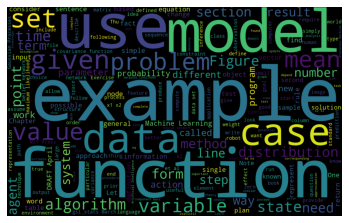

In [133]:
# visualizing data 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

# converting dataframe to string
text = ' '.join(df[0])

# length of text
print('length of text: ', len(text))

# wordcloud
wc = WordCloud(width=1600, height=1000).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
